# Characterizing marine heatwaves with an imprint in the northeast Pacific ocean
#### Cassia Cai

PI: LuAnne Thompson (UW)

Collaborators: Elizabeth Maroon (Univ. Wisconsin-Madison), Anne-Lena Deppenmeier (NCAR), Evan Meeker (Univ. Wisconsin-Madison)

Other committee members: Georgy Manucharyan (UW), Julie Keister (UW)

### Analysis Workflow

#### Introduction
In this Jupyter notebook, we characterize marine heatwave events with an imprint in the northeast Pacific. This is because we are interested in 'Blob'-like events. Here, we attempt to answer: Can we characterize marine heatwave events with an imprint in the northeast Pacific? How? How important is ENSO variability?

#### Before this notebook, we ...
1. Applied Ocetrac to all ensemble members
2. Collected marine heatwave events with an imprint in the northeast Pacific Ocean that last longer than 2 months and covers at least 25% of our pre-defined region.
3. Calculated Nino3.4 and Nino4.0 indices

#### We now work with a dataset of 1131 heatwaves.

In [1]:
# import packages
import xarray as xr; import numpy as np; import pandas as pd; import netCDF4 as nc; import scipy
import matplotlib.pyplot as plt; import cmocean; import seaborn as sns

In [2]:
%%time

# Let's get our saved data files. We have a total of 1131 heatwaves.
file0 = '/glade/work/cassiacai/member0_9_bloblike_events_new_stuff.nc' # 118 MHWs 
file1 = '/glade/work/cassiacai/member10_19_bloblike_events_new_stuff.nc' # 99 MHWs
file2 = '/glade/work/cassiacai/member20_29_bloblike_events_new_stuff.nc' # 121 MHWs
file3 = '/glade/work/cassiacai/member30_39_bloblike_events_new_stuff.nc' # 116 MHWs
file4 = '/glade/work/cassiacai/member40_49_bloblike_events_new_stuff.nc' # 116 MHWs
file5 = '/glade/work/cassiacai/member50_59_bloblike_events_new_stuff.nc' # 123 MHWs
file6 = '/glade/work/cassiacai/member60_69_bloblike_events_new_stuff.nc' # 112 MHWs
file7 = '/glade/work/cassiacai/member70_79_bloblike_events_new_stuff_.nc' # 105 MHWs
file8 = '/glade/work/cassiacai/member80_89_bloblike_events_new_stuff_.nc' # 99 MHWs
file9 = '/glade/work/cassiacai/member90_99_bloblike_events_new_stuff_.nc' # 122 MHWs

files = [file0, file1, file2, file3, file4, file5, file6, file7, file8, file9]

blob_files = []
for i in range(len(files)):
    blob_file_name = xr.open_dataset(files[i])
    blob_files.append(blob_file_name)

CPU times: user 144 ms, sys: 33.3 ms, total: 177 ms
Wall time: 1.08 s


In [3]:
land_mask = np.load('SST_land.npy')
land_mask[land_mask > 0] = np.nan
land_mask[land_mask == 0.] = 1

In [4]:
time_indices = []
mhw_lengths = []

for file_number in range(len(files)):
    SSTa_woarctic = blob_files[file_number].SSTA[:,:,0:160,:]
    SSTa = blob_files[file_number].SSTA[:,:,:]
    ssta_mean_time = SSTa_woarctic[:,:,:,:].mean(axis=(2,3))
    print(file_number)
    for i in range(ssta_mean_time.shape[0]):
        time_indices.append(np.argwhere(np.isfinite(ssta_mean_time[i].values)).flatten())
        mhw_lengths.append(len(np.argwhere(np.isfinite(ssta_mean_time[i].values)).flatten()))

0
1
2
3
4
5
6
7
8
9


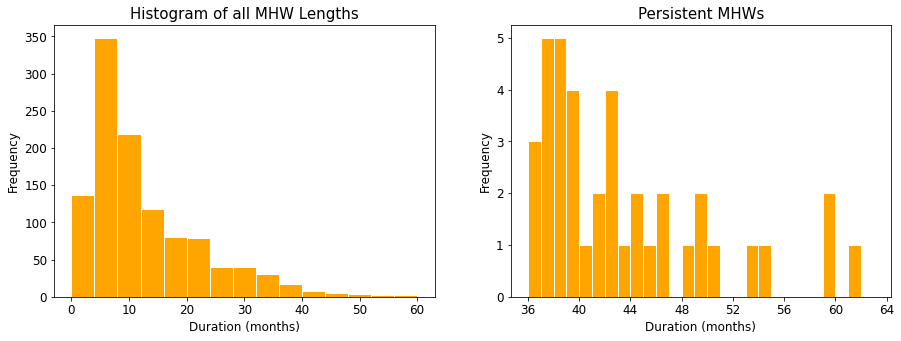

In [5]:
plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1, 2, 1)
plt.title('Histogram of all MHW Lengths', fontsize=15)
plt.hist(mhw_lengths, bins=np.arange(0,64,4), lw=1,ec="white", fc="orange", alpha=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Duration (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
plt.title('Persistent MHWs', fontsize=15)
plt.hist(mhw_lengths, bins=np.arange(36,64,1), lw=1,ec="white", fc="orange", alpha=1)
plt.xticks([36,40,44,48,52,56,60,64],fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Duration (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

#### Scratchwork

In [6]:
file_number = 0
SSTa_woarctic = blob_files[file_number].SSTA[:,:,0:160,:]
SSTa = blob_files[file_number].SSTA[:,:,:]

In [7]:
# time component
ssta_mean_time = SSTa_woarctic[:,:,:,:].mean(axis=(2,3))

In [8]:
# get relevant time indices
time_indices = []
mhw_lengths = []
for i in range(ssta_mean_time.shape[0]):
    time_indices.append(np.argwhere(np.isfinite(ssta_mean_time[i].values)).flatten())
    mhw_lengths.append(len(np.argwhere(np.isfinite(ssta_mean_time[i].values)).flatten()))

In [9]:
# cumulative SSTa
cumulative_SSTA_shapes = blob_files[file_number].SSTA[:,:,0:160,:].sum(dim='time')

In [10]:
# how many have an ENSO signal?
cropped_to_enso_signal_region = cumulative_SSTA_shapes.sel(lat=slice(-10,10), lon=slice(120,290))
cropped_to_enso_signal_region[:,:,:].values[cropped_to_enso_signal_region[:,:,:].values != 0] = 1

enso_area = []
for i in range(len(cropped_to_enso_signal_region)):
    enso_area.append(cropped_to_enso_signal_region[i,:,:].sum().item())

In [11]:
nino34_rolling_mean_first50 = 'nino34_rolling_mean_first50.nc'
nino34 = xr.open_dataset(nino34_rolling_mean_first50)

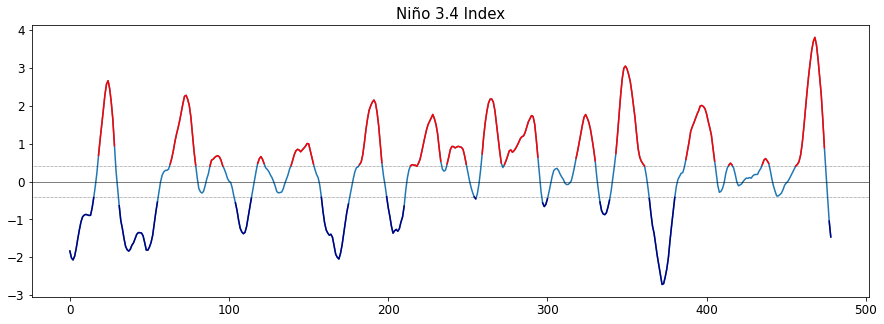

In [12]:
plt.plot(np.arange(481), nino34.SST[0,-481:].values)
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.title('Niño 3.4 Index', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.arange(481), nino34.SST[0,-481:].where(nino34.SST[0,-481:] <= -0.4), c='navy')
plt.plot(np.arange(481), nino34.SST[0,-481:].where(nino34.SST[0,-481:] >= 0.4), c='red')
plt.show()

In [13]:
relevantnino34 = nino34.SST[0,-481:]

In [14]:
enso_area = np.asarray(enso_area)
enso_area[enso_area > 0] = 1
enso_area[enso_area == 0] = -1
print(np.unique(enso_area))

[-1.  1.]


In [16]:
cumulative_area = cumulative_SSTA_shapes.sum(axis=(1,2)).values

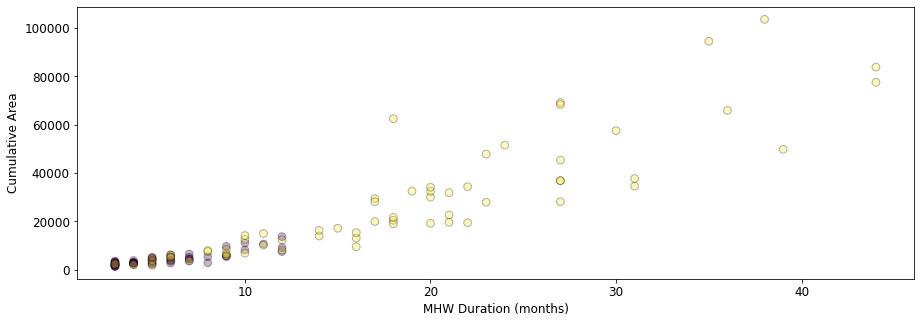

In [17]:
plt.scatter(mhw_lengths, cumulative_area, alpha=0.3, c=enso_area, cmap='viridis', s=60, edgecolors='k')
plt.ylabel('Cumulative Area', fontsize=12)
plt.xlabel('MHW Duration (months)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [191]:
from collections import Counter

flatten = np.concatenate(time_indices)
counted_ = Counter(flatten.ravel())

counts = []; t_index = []; relevantnino34_ls = []; countsmult10 = []
for i in counted_:
    t_index.append(i)
    counts.append(counted_[i])
    countsmult10.append(counted_[i]*20)
    relevantnino34_ls.append(relevantnino34.values[i])

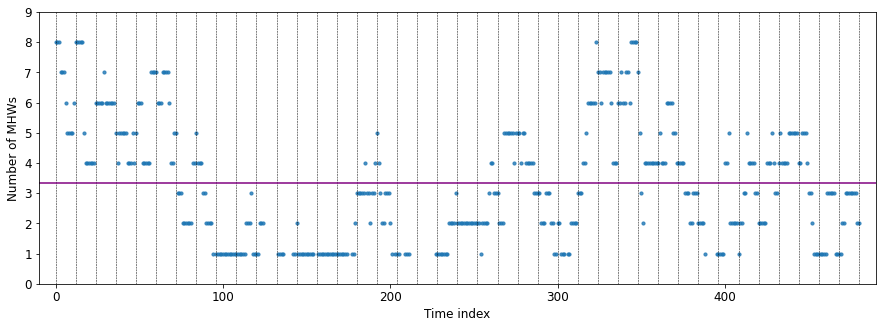

In [137]:
plt.ylim(0,9)
plt.xlim(-10,490)
plt.scatter(t_index, counts, alpha=0.8,s=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.vlines(x=np.arange(0,492,12), ymin=0, ymax=9, color='k', ls='--',lw=0.5)
plt.axhline(y=np.nanmean(counts), color='purple')
plt.ylabel('Number of MHWs', fontsize=12)
plt.xlabel('Time index', fontsize=12)
plt.show()

In [192]:
negativesignal = nino34.SST[0,-481:].where(nino34.SST[0,-481:] <= -0.4)
positivesignal = nino34.SST[0,-481:].where(nino34.SST[0,-481:] >= 0.4)

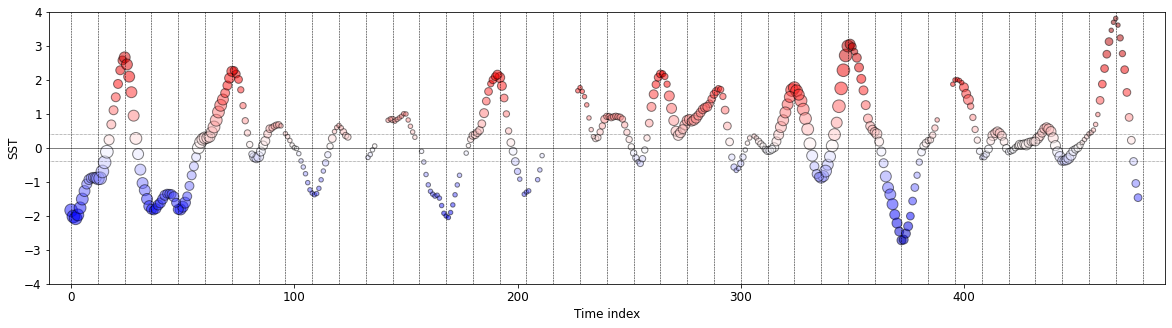

In [197]:
plt.rcParams["figure.figsize"] = (20,5)
plt.ylim(-4,4)
plt.xlim(-10,490)
plt.scatter(t_index, relevantnino34_ls, s=countsmult10, alpha=0.5, c=relevantnino34_ls, cmap= 'seismic',vmin=-4, vmax= 4,ec='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.vlines(x=np.arange(0,492,12), ymin=-4, ymax=4, color='k', ls='--',lw=0.5)
plt.ylabel('SST', fontsize=12)
plt.xlabel('Time index', fontsize=12)
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.show()

In [220]:
start_index = []
for i in range(len(time_indices)):
    start_index.append(time_indices[i][0])

counted_ = Counter(np.asarray(start_index).ravel())

counts = []; t_index = []; relevantnino34_ls = []; countsmult10 = []
for i in counted_:
    t_index.append(i)
    counts.append(counted_[i])
    countsmult10.append(counted_[i]*40)
    relevantnino34_ls.append(relevantnino34.values[i])

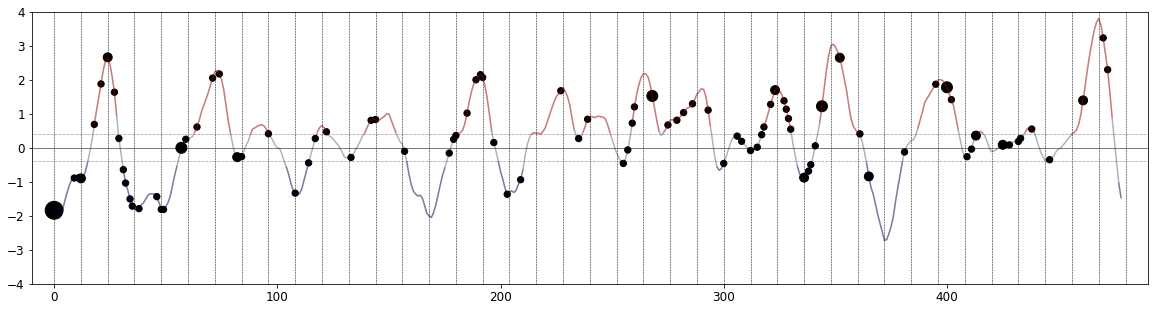

In [224]:
plt.plot(np.arange(481), nino34.SST[0,-481:].values,alpha=0.3,c='k')
plt.ylim(-4,4)
plt.xlim(-10,490)
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='dotted')
plt.vlines(x=np.arange(0,492,12), ymin=-4, ymax=4, color='k', ls='--',lw=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.arange(481), nino34.SST[0,-481:].where(nino34.SST[0,-481:] <= -0.4), c='navy',alpha=0.3)
plt.plot(np.arange(481), nino34.SST[0,-481:].where(nino34.SST[0,-481:] >= 0.4), c='red',alpha=0.3)
plt.scatter(t_index, relevantnino34_ls, s=countsmult10, alpha=1, cmap= 'seismic',vmin=-4, vmax= 4,ec='k', fc='k')
plt.show()

In [228]:
# ---------- mean SSTa
mean_SSTA_shapes = blob_files[file_number].SSTA[:,:,0:160,:].mean(dim='time')